# Predicting Performing Rating of an Employee

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [4]:
import warnings

warnings.filterwarnings("ignore")


In [5]:
df=pd.read_excel(r"C:\Users\arjun\Downloads\future.xls")
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [7]:
df.shape


(1200, 28)

In [8]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [10]:
print(df.isnull().sum())

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


In [11]:
# a new dataframe is created to analyze department wise performance as asked
dept=df.iloc[:,[5,27]].copy() # iloc[rows,cols]
dept_per=dept.copy()

In [12]:
# finding out the mean performance of all the departments and plotting its bar graph
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()


EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

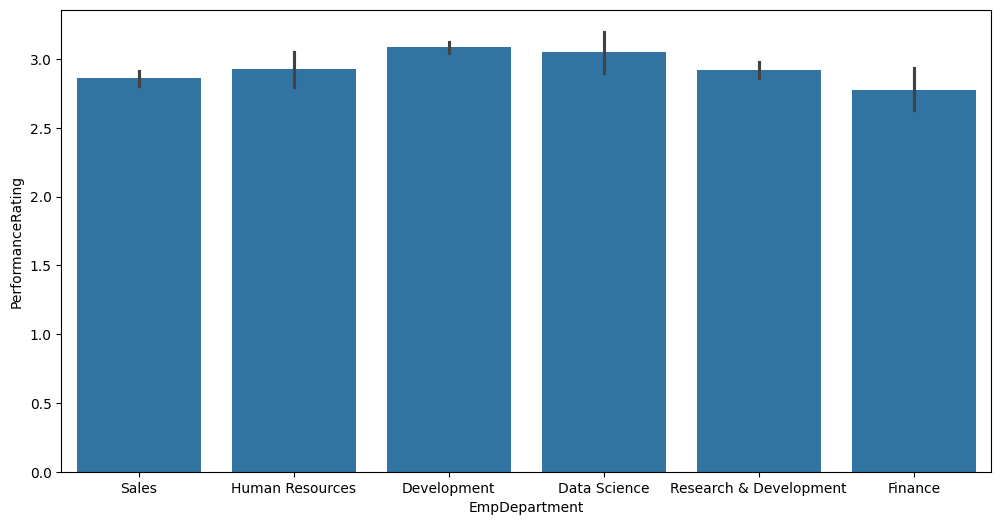

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_per)
plt.show()


In [15]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

there are 3 classes in performance rating , this is classification that
is logistic regression not linear regression

In [16]:
# creating a new dataframes to analyze each department separately 
department =pd.get_dummies(dept_per['EmpDepartment'])
performance=pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

In [17]:
performance

,PerformanceRating
0,3
1,3
2,4
3,3
4,3
...,...
1195,4
1196,3
1197,3
1198,3


In [18]:
dept_rating

,Data Science,Development,Finance,Human Resources,Research & Development,Sales,PerformanceRating
0,False,False,False,False,False,True,3
1,False,False,False,False,False,True,3
2,False,False,False,False,False,True,4
3,False,False,False,True,False,False,3
4,False,False,False,False,False,True,3
...,...,...,...,...,...,...,...
1195,False,False,False,False,False,True,4
1196,False,True,False,False,False,False,3
1197,False,True,False,False,False,False,3
1198,True,False,False,False,False,False,3


In [19]:
department

,Data Science,Development,Finance,Human Resources,Research & Development,Sales
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,True,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
1195,False,False,False,False,False,True
1196,False,True,False,False,False,False
1197,False,True,False,False,False,False
1198,True,False,False,False,False,False


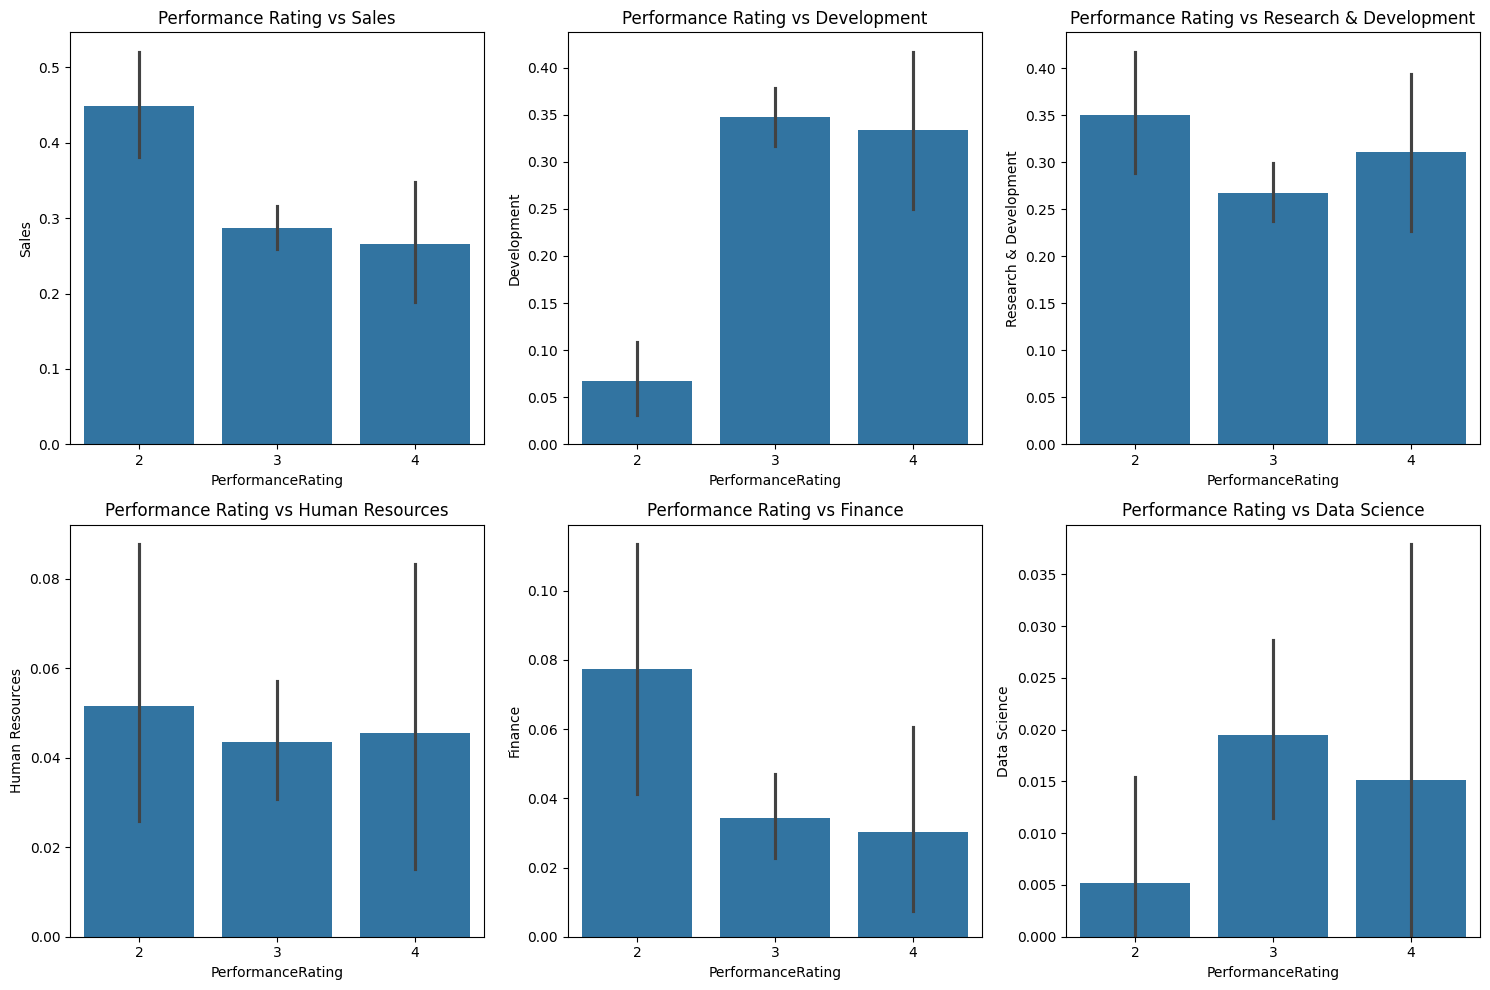

In [20]:
plt.figure(figsize=(15, 10))

# Subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Sales'])
plt.title("Performance Rating vs Sales")

# Subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Development'])
plt.title("Performance Rating vs Development")

# Subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Research & Development'])
plt.title("Performance Rating vs Research & Development")

# Subplot 4
plt.subplot(2, 3, 4)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Human Resources'])
plt.title("Performance Rating vs Human Resources")

# Subplot 5
plt.subplot(2, 3, 5)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Finance'])
plt.title("Performance Rating vs Finance")

# Subplot 6
plt.subplot(2, 3, 6)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Data Science'])
plt.title("Performance Rating vs Data Science")

plt.tight_layout()
plt.show()


In [21]:
enc=LabelEncoder() #if u want to convert categorical data to numerical
for i in (2,3,4,5,6,7,16,26):
    df.iloc[:,i]=enc.fit_transform(df.iloc[:,i])
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [22]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,E100993,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,E100994,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,E100995,34,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3


In [24]:
# Drop the EmpNumber column
df_without_empnumber = df.drop('EmpNumber', axis=1)

# Compute the correlation matrix
correlation_matrix = df_without_empnumber.corr()

# Display the correlation matrix
display(correlation_matrix)


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


In [ ]:
#numeric_df = df.select_dtypes(include='number')
#correlation_matrix = numeric_df.corr()
#display(correlation_matrix)


In [25]:
y=df.PerformanceRating # selected only important cols
#X=df.iloc[:,-1] all predictors were selected it resulted in dropping accuracy
X=df.iloc[:,[4,5,9,16,20,21,22,23,24]] #taking variables with Corr efficient
X.head()

,MaritalStatus,EmpDepartment,EmpEducationLevel,OverTime,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion
0,2,5,3,0,2,2,10,7,0
1,2,5,4,0,2,3,7,7,1
2,1,5,4,1,2,3,18,13,1
3,0,3,4,0,2,2,21,6,12
4,2,5,4,0,1,3,2,2,2


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
X_train

array([[-1.52455302, -0.70098033, -1.83590993, ..., -0.16610389,
        -0.06272953, -0.36255543],
       [ 1.2413747 ,  1.07615291,  0.09541673, ..., -0.32429806,
        -0.34450925, -0.36255543],
       [ 1.2413747 ,  0.48377516,  1.06108007, ..., -0.32429806,
        -0.06272953, -0.36255543],
       ...,
       [ 1.2413747 ,  1.07615291,  0.09541673, ..., -0.32429806,
        -0.06272953, -0.66863237],
       [-1.52455302, -0.70098033, -0.8702466 , ..., -0.32429806,
        -0.06272953, -0.66863237],
       [ 1.2413747 , -1.29335808,  0.09541673, ..., -0.95707477,
        -1.18984842, -0.66863237]])

In [25]:
X_train.shape

(840, 9)

In [26]:
X_test.shape

(360, 9)

In [27]:
from sklearn.linear_model import LogisticRegression
model_logr=LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=model_logr.predict(X_test)

In [29]:
print(accuracy_score(y_pred,y_test))

0.7527777777777778


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.77      0.16      0.26        63
           3       0.75      0.99      0.85       264
           4       0.00      0.00      0.00        33

    accuracy                           0.75       360
   macro avg       0.51      0.38      0.37       360
weighted avg       0.69      0.75      0.67       360



In [31]:
confusion_matrix(y_test,y_pred)

array([[ 10,  53,   0],
       [  3, 261,   0],
       [  0,  33,   0]], dtype=int64)

In [34]:
import numpy as np
fe=np.array([[4,0,9,16,20,0,22,23,0]])
print(model_logr.predict(fe))

[3]
